## Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

/home/injy/mariam_workspace/env3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/injy/mariam_workspace/env3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/injy/mariam_workspace/env3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/injy/mariam_workspace/env3/lib/python3.5/site-

In [3]:
tf.__version__

'1.12.0'

In [4]:
import sys
sys.path.insert(0, '../.')

In [5]:
import cv2

In [8]:
from model import *
from Trainer import *
from evaluation.evaluate import *
# from data.reader import *
# from data.target_utils import *
# from data.dataset_loader import *

In [9]:
dataset = KITTISegmentationDatasetLoader('../../../Data/', None, 0.8, 12, True)

In [10]:
data_list = dataset.get_next()

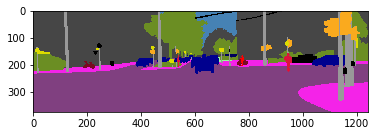

In [11]:
label_img = mpimg.imread('../../../Data//data_semantics/training/semantic_rgb/000149_10.png')
plt.imshow(label_img)

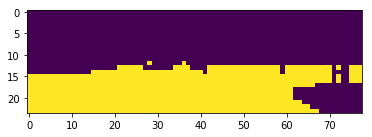

In [12]:
label_img_ground = (label_img[:, :, 0] >= 0.5) & (label_img[:, :, 0] <= 0.51) & (label_img[:, :, 1] >= 0.25) &\
                     (label_img[:, :, 1] <= 0.26) & (label_img[:, :, 2] >= 0.5) & (label_img[:, :, 2] <= 0.51)   
label_img_ground = cv2.resize(label_img_ground.astype(np.float32), (78, 24))
label_img_ground_black = 1 - (label_img_ground < 0.5)
label_img_ground_blue = label_img_ground>= 0.5
label_img_ground = (label_img_ground_black + label_img_ground_blue)/2
label_img_ground = label_img_ground.reshape((24, 78, 1)).astype(np.float32)

plt.imshow(label_img_ground[:, :, 0])

In [13]:
images, labels = data_list

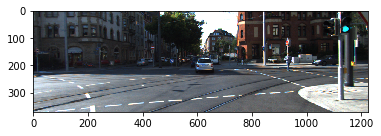

In [14]:
plt.imshow(images[0])

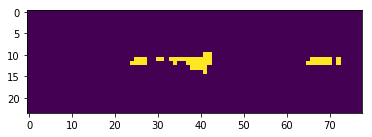

In [15]:
plt.imshow(labels[0, :, :, 0])

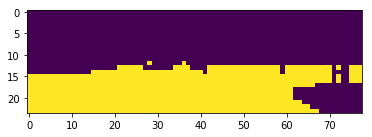

In [16]:
plt.imshow(labels[0, :, :, 1])

In [17]:
np.max(labels[0, :, :, 1])

1.0

In [77]:
np.max(images)

1.0

In [53]:
dataset = CityScapesSegmentationDatasetLoader('../../../Data/', None, 0.8, 190, True)

In [54]:
# for i in range(10):
data_list = dataset.get_next()

In [55]:
images, labels = data_list

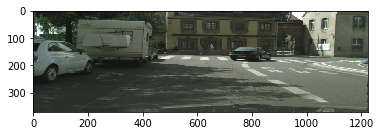

In [56]:
plt.imshow(images[0])

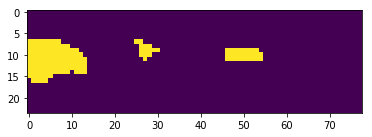

In [57]:
plt.imshow(labels[0, :, :, 0])

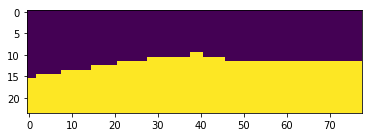

In [26]:
plt.imshow(labels[0, :, :, 1])

In [11]:
images.shape

(4, 370, 1224, 3)

In [12]:
np.max(images)

1.0

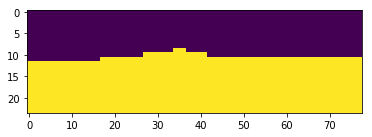

In [21]:
plt.imshow(labels[0, :, :, 1])

## Data

In [5]:
base_path = '../../../Data/leftImg8bit_trainvaltest/leftImg8bit/train/'

In [20]:
labels_base_path = '../../../Data/gtFine_trainvaltest/gtFine/train/'

In [11]:
total_count = 0
cities_train = os.listdir('../../../Data/leftImg8bit_trainvaltest/leftImg8bit/train')
for city in cities_train:
    c = len(os.listdir('../../../Data/leftImg8bit_trainvaltest/leftImg8bit/train/'+city))
    print(city, c)
    total_count += c
print("total count = ", total_count)

monchengladbach 94
krefeld 99
weimar 142
zurich 122
stuttgart 196
bremen 316
tubingen 144
strasbourg 365
jena 119
dusseldorf 221
aachen 174
hanover 196
erfurt 109
hamburg 248
darmstadt 85
cologne 154
bochum 97
ulm 95
total count =  2976


In [51]:
city = 'darmstadt'
city_imgs = os.listdir(base_path + city)

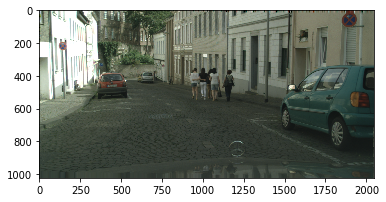

In [17]:
img = mpimg.imread(base_path + city + "/" + city_imgs[0])
plt.imshow(img)

In [75]:
city_imgs[i]

'darmstadt_000051_000019_leftImg8bit.png'

In [52]:
i = 30

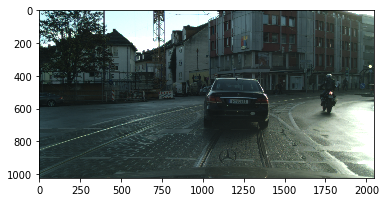

In [53]:
img = mpimg.imread(base_path + city + "/" + city_imgs[i])
plt.imshow(img)

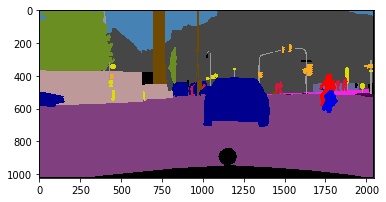

In [72]:
label_img = mpimg.imread(labels_base_path + city + "/" + '_'.join(city_imgs[i].split('_')[:3]) + '_gtFine_color.png')
plt.imshow(label_img)

In [58]:
label_img[600, 1250, :]

array([0.       , 0.       , 0.5568628, 1.       ], dtype=float32)

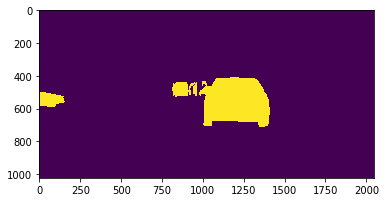

In [63]:
label_img_l = (label_img[:, :, 0] == 0) & (label_img[:, :, 1] == 0) &\
                (label_img[:, :, 2] >= 0.5) & (label_img[:, :, 2] <= 0.6)
plt.imshow(label_img_l)

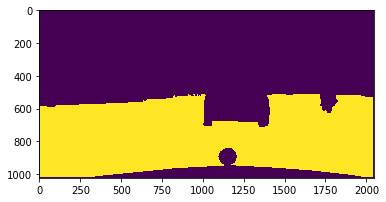

In [73]:
label_img_l = (label_img[:, :, 0] >= 0.5) & (label_img[:, :, 0] <= 0.55) &\
                (label_img[:, :, 1] >= 0.25) & (label_img[:, :, 1] <= 0.26) &\
                (label_img[:, :, 2] >= 0.5) &  (label_img[:, :, 2] <= 0.55)
plt.imshow(label_img_l)

In [67]:
label_img.shape

(24, 78, 1)

In [18]:
out_size=(24, 78, 1)

label_img = cv2.resize(label_img_l.astype(np.float32), (out_size[1], out_size[0]))
label_img_black = 1 - (label_img < 0.5)
label_img_blue = label_img>= 0.5
label_img = (label_img_black + label_img_blue)/2
label_img = label_img.reshape(out_size).astype(np.float32)

plt.imshow(label_img[:, :, 0])

NameError: name 'label_img_l' is not defined

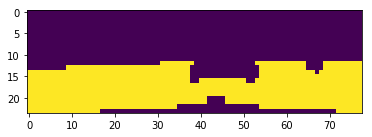

In [74]:
out_size=(24, 78, 1)

label_img = cv2.resize(label_img_l.astype(np.float32), (out_size[1], out_size[0]))
label_img_black = 1 - (label_img < 0.5)
label_img_blue = label_img>= 0.5
label_img = (label_img_black + label_img_blue)/2
label_img = label_img.reshape(out_size).astype(np.float32)

plt.imshow(label_img[:, :, 0])

In [7]:
out_size=(24, 78, 1)


In [7]:
dir_name = 'train'

cities = os.listdir('../../../Data'+'/leftImg8bit_trainvaltest/leftImg8bit/' + dir_name + '/')
list_files = []
for city in cities:
        tmp = os.listdir('../../../Data'+'/leftImg8bit_trainvaltest/leftImg8bit/' + dir_name + '/' + city)
        tmp = list(map(lambda x: city + '/' + '_'.join(x.split('_')[:3]), tmp))
        list_files.extend(tmp)
    
random.seed(0)
random.shuffle(list_files)

print(len(list_files))

2976


In [42]:
# from data.preprocessing import *
from data.img_branch_data_reader import *

In [64]:
base_path='../../../Data'
image_size=(370, 1224)
out_size=(370, 1224, 1)
num_samples=None
training_per=0.8
random_seed=0
training=True
dir_name = 'train'
    
cities = os.listdir(base_path+'/leftImg8bit_trainvaltest/leftImg8bit/' + dir_name + '/')
list_files = []
for city in cities:
        tmp = os.listdir(base_path+'/leftImg8bit_trainvaltest/leftImg8bit/' + dir_name + '/' + city)
        tmp = list(map(lambda x: city + '/' + '_'.join(x.split('_')[:3]), tmp))
        list_files.extend(tmp)
    
random.seed(random_seed)
random.shuffle(list_files)

print(len(list_files))

camera_paths = list(map(lambda x: base_path+'/leftImg8bit_trainvaltest/leftImg8bit/' + dir_name + '/' + x + '_leftImg8bit.png', list_files))

label_paths = list(map(lambda x: base_path + '/gtFine_trainvaltest/gtFine/' + dir_name + '/' + x + '_gtFine_polygons.json', list_files))
    
ln = num_samples
if ln is None:
        ln = int(len(list_files) * training_per)
    
if training:
        list_camera_paths = camera_paths[:ln]
        list_label_paths = label_paths[:ln]
else:
        list_camera_paths = camera_paths[ln:]
        list_label_paths = label_paths[ln:]

        
for camera_path, label_path in zip(list_camera_paths, list_label_paths):

            image = mpimg.imread(camera_path)
            # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            w, h, _ = image.shape
            image = cv2.resize(image, (1224, 370))

            with open(label_path) as json_file:
                data = json.load(json_file)
            objs = data['objects']

            cars_mask = np.zeros((w, h))
            ground_mask = np.zeros((w, h))
            for i in range(len(objs)):
                if objs[i]['label'] in ['car', 'truck']:
                    temp = np.array(objs[i]['polygon'])
                    rr, cc = polygon(temp[:, 0], temp[:, 1], (h, w))
                    cars_mask[cc, rr] = 1
                elif objs[i]['label'] in ['road']:
                    temp = np.array(objs[i]['polygon'])
                    rr, cc = polygon(temp[:, 0], temp[:, 1], (h, w))
                    ground_mask[cc, rr] = 1
                
            label_img_cars = cv2.resize(cars_mask.astype(np.float32), (out_size[1], out_size[0]))
            label_img_cars = label_img_cars.reshape(out_size).astype(np.float32)

            label_img_ground = cv2.resize(ground_mask.astype(np.float32), (out_size[1], out_size[0]))
            label_img_ground = label_img_ground.reshape(out_size).astype(np.float32)

            images = [image, image[:, ::-1, :]]
            labels_cars = [label_img_cars, label_img_cars[:, ::-1, :]]
            labels_ground = [label_img_ground, label_img_ground[:, ::-1, :]]
            
            break

2976


In [72]:
dataset = make_dataset_img('../../../Data/', batch_size=1, num_samples=None, training_per=0.8, random_seed=0, training=True)

images = []
labels_cars = []
labels_ground = []
# for _ in range(2):
image, label_cars, label_ground = list(next(dataset))
images.extend(image)
labels_cars.extend(label_cars)
labels_ground.extend(label_ground)

images = np.array(images)
labels_cars = np.array(labels_cars)
labels_ground = np.array(labels_ground)

labels = np.concatenate([labels_cars, labels_ground], axis=-1)
print(labels.shape)

2976
(4, 24, 78, 2)


In [73]:
np.max(images)

1.0

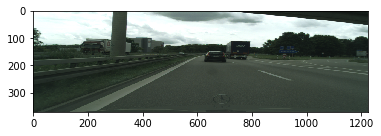

In [76]:
plt.imshow(images[0])

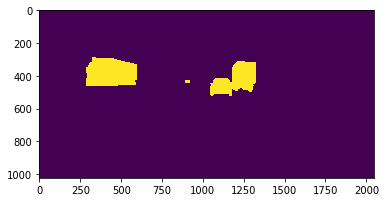

In [77]:
plt.imshow(cars_mask)

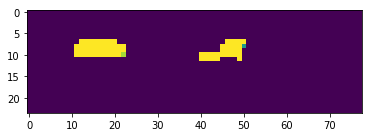

In [85]:
plt.imshow(labels[3, :, :, 0])

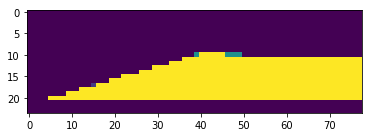

In [82]:
plt.imshow(labels[3, :, :, 1])

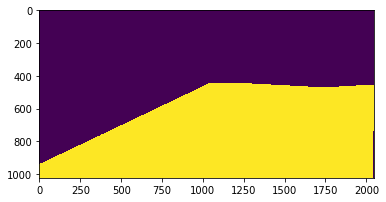

In [80]:
plt.imshow(ground_mask)

In [81]:
np.max(images)

1.0

In [123]:
dataset = make_dataset_img('../../../Data/', batch_size=1, num_samples=None, training_per=0.8, random_seed=0, training=True)


images = []
labels_cars = []
labels_ground = []
for _ in range(2):
    image, label_cars, label_ground = list(next(dataset))
    images.extend(image)
    labels_cars.extend(label_cars)
    labels_ground.extend(label_ground)

images = np.array(images)
labels_cars = np.array(labels_cars)
labels_ground = np.array(labels_ground)

labels = np.concatenate([labels_cars, labels_ground], axis=-1)
print(labels.shape)


camera_paths = list(map(lambda x: '../../../Data/'+'/leftImg8bit_trainvaltest/leftImg8bit/' + dir_name + '/' + x + '_leftImg8bit.png', list_files))

label_paths = list(map(lambda x: '../../../Data/' + '/gtFine_trainvaltest/gtFine/' + dir_name + '/' + x + '_gtFine_color.png', list_files))
    
i = 0
for camera_path, label_path in zip(camera_paths, label_paths):
#             i += 1
#             if i < 5:
#                 continue
            print(camera_path, label_path)
            image = cv2.imread(camera_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            w, h, _ = image.shape
            image = cv2.resize(image, (1224, 370))

#             label_img = cv2.imread(label_path)
#             label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
            label_img = mpimg.imread(label_path)

            label_img_cars = (label_img[:, :, 0] >= 0.5) & (label_img[:, :, 1] == 0) &\
                        (label_img[:, :, 2] >= 0.5) & (label_img[:, :, 2] <= 0.6)
#             label_img_cars = cv2.resize(label_img_cars.astype(np.float32), (out_size[1], out_size[0]))
#             label_img_cars_black = 1 - (label_img_cars < 0.5)
#             label_img_cars_blue = label_img_cars>= 0.5
#             label_img_cars = (label_img_cars_black + label_img_cars_blue)/2
#             label_img_cars = label_img_cars.reshape(out_size).astype(np.float32)

            label_img_ground = (label_img[:, :, 0] >= 0.5) & (label_img[:, :, 0] <= 0.55) &\
                (label_img[:, :, 1] >= 0.25) & (label_img[:, :, 1] <= 0.26) &\
                (label_img[:, :, 2] >= 0.5) &  (label_img[:, :, 2] <= 0.55)
            label_img_ground = cv2.resize(label_img_ground.astype(np.float32), (out_size[1], out_size[0]))
            label_img_ground_black = 1 - (label_img_ground < 0.5)
            label_img_ground_blue = label_img_ground>= 0.5
            label_img_ground = (label_img_ground_black + label_img_ground_blue)/2
            label_img_ground = label_img_ground.reshape(out_size).astype(np.float32)

#             images = [image/255., image[:, ::-1, :]/255.]
#             labels_cars = [label_img_cars, label_img_cars[:, ::-1, :]]
#             labels_ground = [label_img_ground, label_img_cars[:, ::-1, :]]

            
#             temp_image = image.copy()
#             temp_image[:, -100:, :] = 0
#             temp_image[:, :100, :] = 0
#             images.append(temp_image/255.)

#             temp_label = label_img_cars.copy()
#             temp_label[:, -int((100/370)*out_size[0]):, :] = 0
#             temp_label[:, :int((100/370)*out_size[0]), :] = 0
#             labels_cars.append(temp_label)

#             temp_label = label_img_ground.copy()
#             temp_label[:, -int((100/370)*out_size[0]):, :] = 0
#             temp_label[:, :int((100/370)*out_size[0]), :] = 0
#             labels_ground.append(temp_label)

#             temp_image = image.copy()
#             temp_image[-50:, :, :] = 0
#             temp_image[:50, :, :] = 0
#             images.append(temp_image/255.)

#             temp_label = label_img_cars.copy()
#             temp_label[-int((50/1224)*out_size[1]):, :, :] = 0
#             temp_label[:int((50/1224)*out_size[1]), :, :] = 0
#             labels_cars.append(temp_label)

#             temp_label = label_img_ground.copy()
#             temp_label[-int((50/1224)*out_size[1]):, :, :] = 0
#             temp_label[:int((50/1224)*out_size[1]), :, :] = 0
#             labels_ground.append(temp_label)
            break


2976
(8, 24, 78, 2)
../../../Data//leftImg8bit_trainvaltest/leftImg8bit/train/stuttgart/stuttgart_000195_000019_leftImg8bit.png ../../../Data//gtFine_trainvaltest/gtFine/train/stuttgart/stuttgart_000195_000019_gtFine_color.png


In [131]:
np.max(images)

1.0

In [10]:
image[0].shape

(370, 1224, 3)

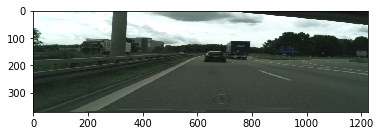

In [40]:
plt.imshow(image)

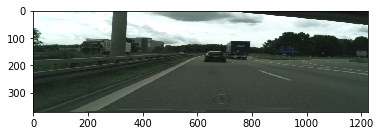

In [41]:
plt.imshow(image)

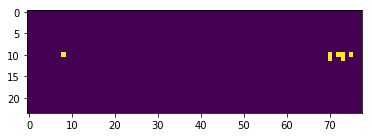

In [42]:
plt.imshow(label_cars[0][:, :, 0])

In [34]:
np.max(label_cars)

1.0

In [49]:
label_img[500, 1300]

array([0.5019608, 0.2509804, 0.5019608, 1.       ], dtype=float32)

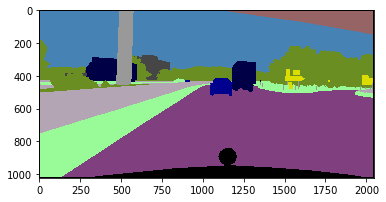

In [46]:
plt.imshow(label_img[:, :])

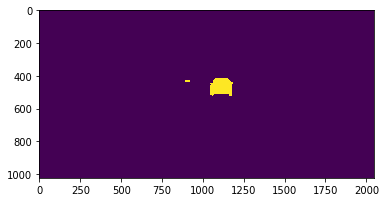

In [48]:
plt.imshow(label_img_cars[:, :])

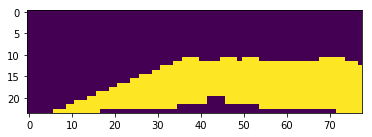

In [47]:
plt.imshow(labels_ground[0][:, :, 0])

In [106]:
labels_ground[0].shape

(24, 78, 1)

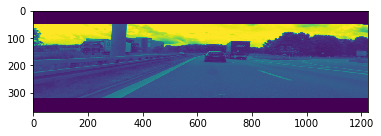

In [165]:
plt.imshow(images[3, :, :, 1])

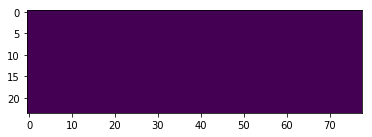

In [173]:
plt.imshow(labels_ground[2, :, :, 0])

In [63]:
from matplotlib.patches import Polygon

In [51]:
import json

In [124]:
with open('../../../Data/gtFine_trainvaltest/gtFine/train/stuttgart/stuttgart_000195_000019_gtFine_polygons.json') as json_file:
    data = json.load(json_file)

In [125]:
objs = data['objects']
objs[20]

{'label': 'pole',
 'polygon': [[1354, 458], [1354, 439], [1355, 439], [1355, 458]]}

In [126]:
for i in range(len(objs)):
    print(objs[i]['label'])

terrain
sky
bridge
road
vegetation
building
vegetation
vegetation
guard rail
guard rail
truck
terrain
terrain
terrain
car
terrain
guard rail
pole
terrain
vegetation
pole
static
pole
pole
pole
pole
pole
pole
traffic sign
traffic sign
traffic sign
traffic sign
traffic sign
pole
pole
traffic sign
pole
traffic sign
pole
traffic sign
pole
pole
pole
guard rail
terrain
truck
license plate
vegetation
guard rail
car
license plate
ego vehicle
out of roi


In [96]:
from skimage.draw import line, polygon, circle, ellipse

In [97]:
objs[0]['polygon']

[[265, 0], [1661, 0], [1667, 227], [971, 216], [609, 284], [344, 211]]

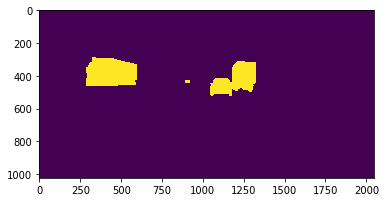

In [127]:
img = mpimg.imread('../../../Data/leftImg8bit_trainvaltest/leftImg8bit/train/stuttgart/stuttgart_000195_000019_leftImg8bit.png')

cars_mask = np.zeros((img.shape[0], img.shape[1]))
for i in range(len(objs)):
    if objs[i]['label'] in ['car', 'truck']:
        temp = np.array(objs[i]['polygon'])
        rr, cc = polygon(temp[:, 0], temp[:, 1], (img.shape[1], img.shape[0]))
        cars_mask[cc, rr] = 1
        

plt.imshow(cars_mask)


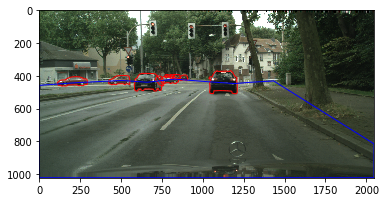

In [94]:
img = mpimg.imread('../../../Data/leftImg8bit_trainvaltest/leftImg8bit/train/bochum/bochum_000000_000600_leftImg8bit.png')
# plt.imshow(img)

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
for i in range(len(objs)):
    if objs[i]['label'] in ['car', 'truck']:
        rect = Polygon(objs[i]['polygon'],linewidth=1,edgecolor='r',facecolor='None')

        # Add the patch to the Axes
        ax.add_patch(rect)

        
# Create a Rectangle patch
for i in range(len(objs)):
    if objs[i]['label'] in ['road']:
        rect = Polygon(objs[i]['polygon'],linewidth=1,edgecolor='b',facecolor='None')

        # Add the patch to the Axes
        ax.add_patch(rect)

        
plt.show()